# Introduction
## Contexte de l'étude
Cette analyse s'appuie sur les données de l'article scientifique intitulé "Framing side effects positively improves clinical trial participants’ perceived control and reduces symptom burden: A randomized controlled trial", publié dans PLOS ONE (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0209851#pone-0209851-g001).
L'étude explore comment le cadrage positif des effets secondaires (en les présentant comme un signe que le médicament est actif) influence la perception des participants et leur fardeau symptomatique, par rapport à un cadrage neutre ou négatif.

### Source des données
Les données utilisées dans ce notebook proviennent du fichier Excel raw_data_framing_side_effects_positively.xlsx, qui contient les données brutes de l'étude. Ce fichier est structuré en deux feuilles :

raw_data : Contient les données des participants, y compris les scores de douleur, les effets secondaires, les scores psychologiques, etc.

metadata : Fournit une description des colonnes et des variables.

## Objectif du notebook
Ce notebook Jupyter a pour objectif de :

1) Décrire et explorer les données (DATA_description) pour comprendre leur structure et leur contenu.

2) Valider les calculs statistiques effectués dans l'article en reproduisant les analyses.

3) Identifier les modèles statistiques utilisés dans l'article et les hypothèses testées.

 4) Effectuer un rééchantillonnage pour vérifier la robustesse des résultats.



## 1. DATA_description


Objectif

Explorer les données pour comprendre leur structure, les variables disponibles et les relations entre elles.

Identifier les variables clés (par exemple, scores de douleur, effets secondaires, scores psychologiques)

#### 1.1.Importation des données : Charger le fichier Excel et explorer les premières lignes.

In [1]:
import pandas as pd


file_path = r"C:\Users\nassi\OneDrive\Desktop\nassim dammak\annee universitaire 2024-2025\INRIA\statistiques-\raw_data_framing_side_effects_positively.xlsx"
df = pd.read_excel(file_path, sheet_name="raw_data")

 
df.head()

c:\Users\nassi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,record_id,@1N_2P,mean_mod_Av,mean_mod_Après,Delta_Mean_Mod,LOT_Score,score_ASI,Score_stai,Score_Pers,Score_Cat,...,age,conc1,anx1,fatigue1,conc2,anx2,fatigue2,seq_test,mean_intensity_total,mean_intensity_attr
0,102,1,2.828571,1.957143,-0.871429,17,22,20,28,-,...,18,8.0,1.0,6.0,8.0,0,6.0,46.0,1.600000,1.0
1,104,1,3.685714,2.842857,-0.842857,18,20,26,44,-,...,22,6.0,0.0,7.0,7.0,0,5.0,46.0,1.666667,1.0
2,105,1,3.557143,1.700000,-1.857143,18,8,26,37,0,...,21,7.0,2.0,4.0,8.0,5,4.0,47.0,1.000000,1.0
3,106,1,3.842857,3.857143,0.014286,14,20,36,42,1,...,22,8.0,3.0,4.0,0.0,0,0.0,47.0,1.000000,1.0
4,107,1,4.100000,4.657143,0.557143,17,6,20,24,0,...,30,5.0,0.0,2.0,5.0,0,2.0,47.5,0.000000,0.0


#### 1.2.	Nettoyage des données : Vérifier les valeurs manquantes, les formats de données et les éventuelles erreurs.

In [2]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

# Afficher le nombre total de valeurs manquantes
total_missing_values = missing_values.sum()
print("\nNombre total de valeurs manquantes :", total_missing_values)

# Afficher les lignes contenant des valeurs manquantes
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nLignes contenant des valeurs manquantes :")
print(rows_with_missing_values if not rows_with_missing_values.empty else "Aucune ligne avec des valeurs manquantes.")

# Afficher les types des colonnes clairement
print("\nTypes des colonnes :")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

# Vérifier les valeurs invalides dans la colonne 'age'
if 'age' in df.columns:
    invalid_age = df[df['age'] < 0]
    print("\nValeurs invalides dans la colonne 'age' :")
    print(invalid_age if not invalid_age.empty else "Aucune valeur invalide trouvée.")

    # Afficher le nombre total de valeurs invalides dans la colonne 'age'
    total_invalid_age = invalid_age.shape[0]
    print("\nNombre total de valeurs invalides dans la colonne 'age' :", total_invalid_age)

    # Corriger les erreurs en remplaçant les valeurs négatives par NaN
    df.loc[df['age'] < 0, 'age'] = pd.NA


    # Remplacer les groupes 1 → Contrôle, 2 → Positif
df['Groupe'] = df['@1N_2P'].replace({1: 'Contrôle', 2: 'Positif'})

Valeurs manquantes par colonne :
record_id               0
@1N_2P                  0
mean_mod_Av             0
mean_mod_Après          0
Delta_Mean_Mod          0
                       ..
anx2                    0
fatigue2                0
seq_test                0
mean_intensity_total    0
mean_intensity_attr     0
Length: 70, dtype: int64

Nombre total de valeurs manquantes : 63

Lignes contenant des valeurs manquantes :
    record_id  @1N_2P  mean_mod_Av  mean_mod_Après  Delta_Mean_Mod  LOT_Score  \
1         104       1     3.685714        2.842857       -0.842857         18   
2         105       1     3.557143        1.700000       -1.857143         18   
3         106       1     3.842857        3.857143        0.014286         14   
4         107       1     4.100000        4.657143        0.557143         17   
5         111       1     7.414286        6.600000       -0.814286         16   
..        ...     ...          ...             ...             ...        ...   
61   

#### 1.3	Statistiques descriptives : Calculer des indicateurs clés (moyennes, écarts-types, etc.) pour chaque groupe (contrôle vs positif).

Sépare les données en deux groupes (groupe_controle et groupe_positif) en utilisant la colonne @1N_2P.
Calcule la moyenne, l'écart-type, la médiane et le nombre d'observations pour chaque groupe.
Crée un DataFrame statistiques_df pour afficher les résultats sous forme de tableau.
Affiche les résultats

In [3]:
# statistiques descriptives
statistiques_df = df.groupby('@1N_2P')['Delta_Mean_Mod'].describe()

# resultat
display(statistiques_df)


,count,mean,std,min,25%,50%,75%,max
@1N_2P,,,,,,,,
1,33.0,-1.026840,1.173059,-2.957143,-2.014286,-0.828571,-0.057143,1.042857
2,33.0,-1.052381,1.221364,-4.171429,-1.742857,-1.100000,-0.100000,1.000000


#### 1.4	Visualisations : Créer des graphiques pour explorer les distributions et les relations entre les variables.

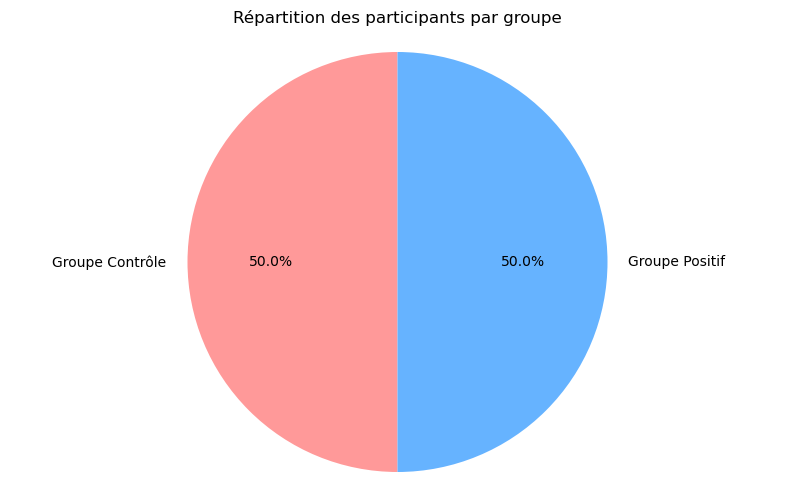

<Figure size 1000x600 with 0 Axes>

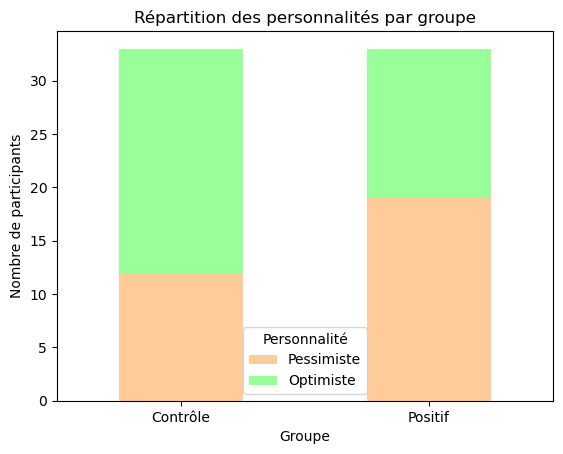

<Figure size 1000x600 with 0 Axes>

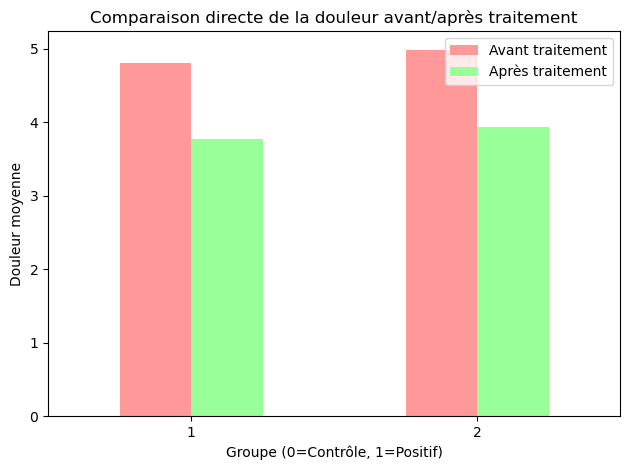

<Figure size 1000x600 with 0 Axes>

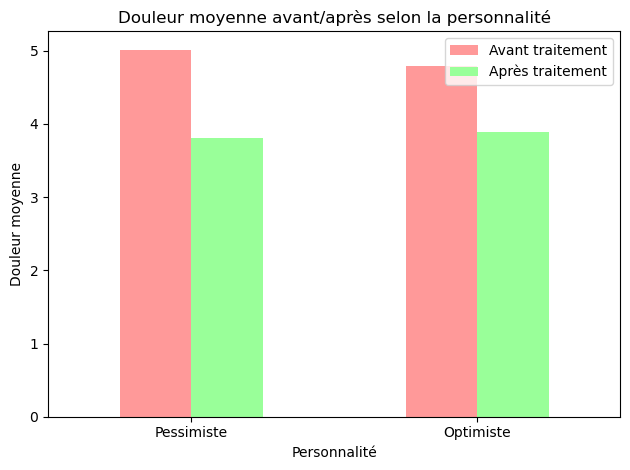

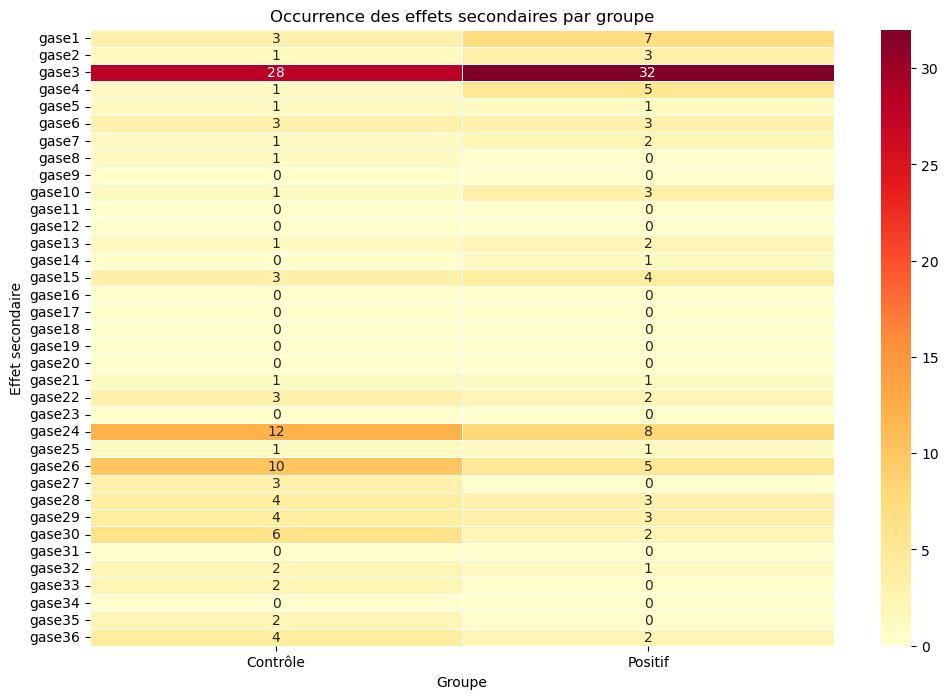


Top 5 des effets secondaires les plus fréquents :
Bouche sèche: 60
Fatigue, perte d’énergie: 20
Insomnie, troubles du sommeil: 15
Mal de tête: 10
Douleur articulaire: 8


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
#1. Compter le nombre de personnes dans chaque groupe

counts = df['@1N_2P'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(counts, 
        labels=['Groupe Contrôle', 'Groupe Positif'], 
        colors=['#ff9999','#66b3ff'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Répartition des participants par groupe')
plt.axis('equal')  # Pour un cercle parfait
plt.show()


#2. Compter les personnalités dans chaque groupe

median_lot = df["LOT_Score"].median()

personality_counts = df.groupby(['@1N_2P', df["LOT_Score"] >= median_lot]).size().unstack()
personality_counts.columns = ["Pessimiste", "Optimiste"]

plt.figure(figsize=(10, 6))
personality_counts.plot(kind='bar', stacked=True, color=['#ffcc99','#99ff99'])
plt.title('Répartition des personnalités par groupe')
plt.xlabel('Groupe')
plt.ylabel('Nombre de participants')
plt.xticks([0, 1], ['Contrôle', 'Positif'], rotation=0)
plt.legend(title='Personnalité')
plt.show()

#3. Version ultra-simple pour la douleur

plt.figure(figsize=(10, 6))
resultats = df.groupby('@1N_2P')[['mean_mod_Av', 'mean_mod_Après']].mean()
resultats.plot(kind='bar', color=['#FF9999', '#99FF99'])
plt.title('Comparaison directe de la douleur avant/après traitement')
plt.xlabel('Groupe (0=Contrôle, 1=Positif)')
plt.ylabel('Douleur moyenne')
plt.xticks(rotation=0)
plt.legend(['Avant traitement', 'Après traitement'])
plt.tight_layout()
plt.show()

#4. Version ultra-simple pour la douleur (par personnalité)
plt.figure(figsize=(10, 6))
resultats_perso = df.groupby([df["LOT_Score"] >= median_lot])[['mean_mod_Av', 'mean_mod_Après']].mean()
resultats_perso.index = ["Pessimiste", "Optimiste"]
resultats_perso.plot(kind='bar', color=['#FF9999', '#99FF99'])
plt.title('Douleur moyenne avant/après selon la personnalité')
plt.xlabel('Personnalité')
plt.ylabel('Douleur moyenne')
plt.xticks(rotation=0)
plt.legend(['Avant traitement', 'Après traitement'])
plt.tight_layout()
plt.show()

#5. Carte thermique des effets secondaires par groupe
effets_par_groupe = df.groupby('@1N_2P')[[col for col in df.columns if col.startswith('gase')]].sum().T
effets_par_groupe.columns = ['Contrôle', 'Positif']

plt.figure(figsize=(12, 8))
sns.heatmap(effets_par_groupe, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
plt.title('Occurrence des effets secondaires par groupe')
plt.xlabel('Groupe')
plt.ylabel('Effet secondaire')
plt.show()

# 6. Top 5 des effets secondaires les plus fréquents avec descriptions
top_5_effets = effets_par_groupe.sum(axis=1).nlargest(5)

# Création d'un dictionnaire de correspondance entre codes GASE et descriptions
gase_descriptions = {
    'gase1': 'Mal de tête',
    'gase2': 'Perte de cheveux',
    'gase3': 'Bouche sèche',
    'gase4': 'Vertiges',
    'gase5': 'Douleur thoracique',
    'gase6': 'Palpitations, rythme cardiaque irrégulier',
    'gase7': 'Problèmes respiratoires',
    'gase8': 'Hypotension, autres problèmes de circulation',
    'gase9': 'Douleurs abdominales',
    'gase10': 'Nausées',
    'gase11': 'Vomissements',
    'gase12': 'Constipation',
    'gase13': 'Diarrhée',
    'gase14': 'Diminution de l’appétit',
    'gase15': 'Augmentation de l’appétit',
    'gase16': 'Difficultés à uriner',
    'gase17': 'Problèmes de performance sexuelle ou des organes sexuels',
    'gase18': 'Éruption cutanée ou démangeaisons',
    'gase19': 'Tendance aux ecchymoses (bleus)',
    'gase20': 'Fièvre, température corporelle élevée',
    'gase21': 'Transpiration anormale',
    'gase22': 'Bouffées de chaleur',
    'gase23': 'Convulsions ou crises d’épilepsie',
    'gase24': 'Fatigue, perte d’énergie',
    'gase25': 'Tremblements',
    'gase26': 'Insomnie, troubles du sommeil',
    'gase27': 'Cauchemars ou rêves anormaux',
    'gase28': 'Douleur au dos',
    'gase29': 'Douleur musculaire',
    'gase30': 'Douleur articulaire',
    'gase31': 'Agitation',
    'gase32': 'Irritabilité, nervosité',
    'gase33': 'Humeur dépressive',
    'gase34': 'Pensées suicidaires',
    'gase35': 'Anxiété, peur',
    'gase36': 'Divers'
}
print("\nTop 5 des effets secondaires les plus fréquents :")
for gase_code, count in top_5_effets.items():
    print(f"{gase_descriptions.get(gase_code, gase_code)}: {count}")

 ## 2. Valider les calculs statistiques effectués dans l'article en reproduisant les analyses.
 
Objectif : Reproduire les analyses statistiques de l'article
L'article examine l'effet du cadrage sur la perception de la douleur et les effets secondaires en fonction de la personnalité. Il utilise :



#### 📖 2.1 Modèles utilisés (source : article PLOS ONE)


Les auteurs utilisent :
- ANOVA pour analyser les effets principaux du groupe et de la personnalité (optimisme)
- Régressions linéaires avec interactions :
    douleur_apres ~ Groupe + Optimisme + Groupe*Optimisme
- Tests t pour comparaisons simples
- Corrélation de Pearson pour relation entre deux variables continues

Source : section "Statistical analyses" de l'article
[section "Statistical analyses" de l’article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0209851#sec011)


In [5]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import statsmodels.stats.multitest as smm

# 📌 Liste des variables continues à comparer
variables = [
    'age', 'LOT_Score', 'Score_stai', 'score_ASI',
    'Score_Cat', 'exp_soulage_pers_n', 'mean_mod_Av',
    'mean_mod_Après', 'Delta_Mean_Mod'
]

results = []

for var in variables:
    # Conversion en numérique si besoin
    df[var] = pd.to_numeric(df[var], errors='coerce')

    # Création des sous-groupes
    g0 = df[df['Groupe'] == 'Contrôle'][var].dropna()
    g1 = df[df['Groupe'] == 'Positif'][var].dropna()

    # Vérification de la taille des groupes
    if len(g0) > 0 and len(g1) > 0:
        t, p = ttest_ind(g0, g1, equal_var=False)
    else:
        t, p = np.nan, np.nan

    results.append({
        'Variable': var,
        'Moyenne Contrôle': g0.mean(),
        'Écart-type Contrôle': g0.std(),
        'Moyenne Positif': g1.mean(),
        'Écart-type Positif': g1.std(),
        'Différence': g1.mean() - g0.mean(),
        't-stat': t,
        'p-value': p
    })

# Résumé des résultats
df_results = pd.DataFrame(results)

# Correction des p-values (non affichée mais utile)
_, p_corr, _, _ = smm.multipletests(df_results['p-value'], method='fdr_bh')
df_results['p-value corrigée'] = p_corr

# Tri par significativité
df_results.sort_values('p-value corrigée', inplace=True)
df_results.reset_index(drop=True, inplace=True)

# Arrondis
df_arrondi = df_results.round(1)
df_arrondi['p-value'] = df_results['p-value'].round(2)

# Colonnes à afficher
colonnes_afficher = [
    'Variable',
    'Moyenne Contrôle',
    'Écart-type Contrôle',
    'Moyenne Positif',
    'Écart-type Positif',
    'Différence',
    'p-value'
]

# Affichage final
pd.set_option('display.max_rows', None)
display(df_arrondi[colonnes_afficher])


,Variable,Moyenne Contrôle,Écart-type Contrôle,Moyenne Positif,Écart-type Positif,Différence,p-value
0,LOT_Score,16.6,4.8,15.1,4.2,-1.5,0.18
1,Score_stai,28.3,8.8,30.9,8.6,2.6,0.22
2,score_ASI,15.3,7.5,18.2,8.0,2.8,0.14
3,Score_Cat,1.6,1.7,2.3,2.3,0.7,0.20
4,exp_soulage_pers_n,5.9,1.9,6.6,4.1,0.6,0.42
5,mean_mod_Av,4.8,1.2,5.0,0.8,0.2,0.47
6,mean_mod_Après,3.8,1.6,3.9,1.4,0.2,0.66
7,age,24.2,4.0,24.5,4.3,0.3,0.77
8,Delta_Mean_Mod,-1.0,1.2,-1.1,1.2,-0.0,0.93


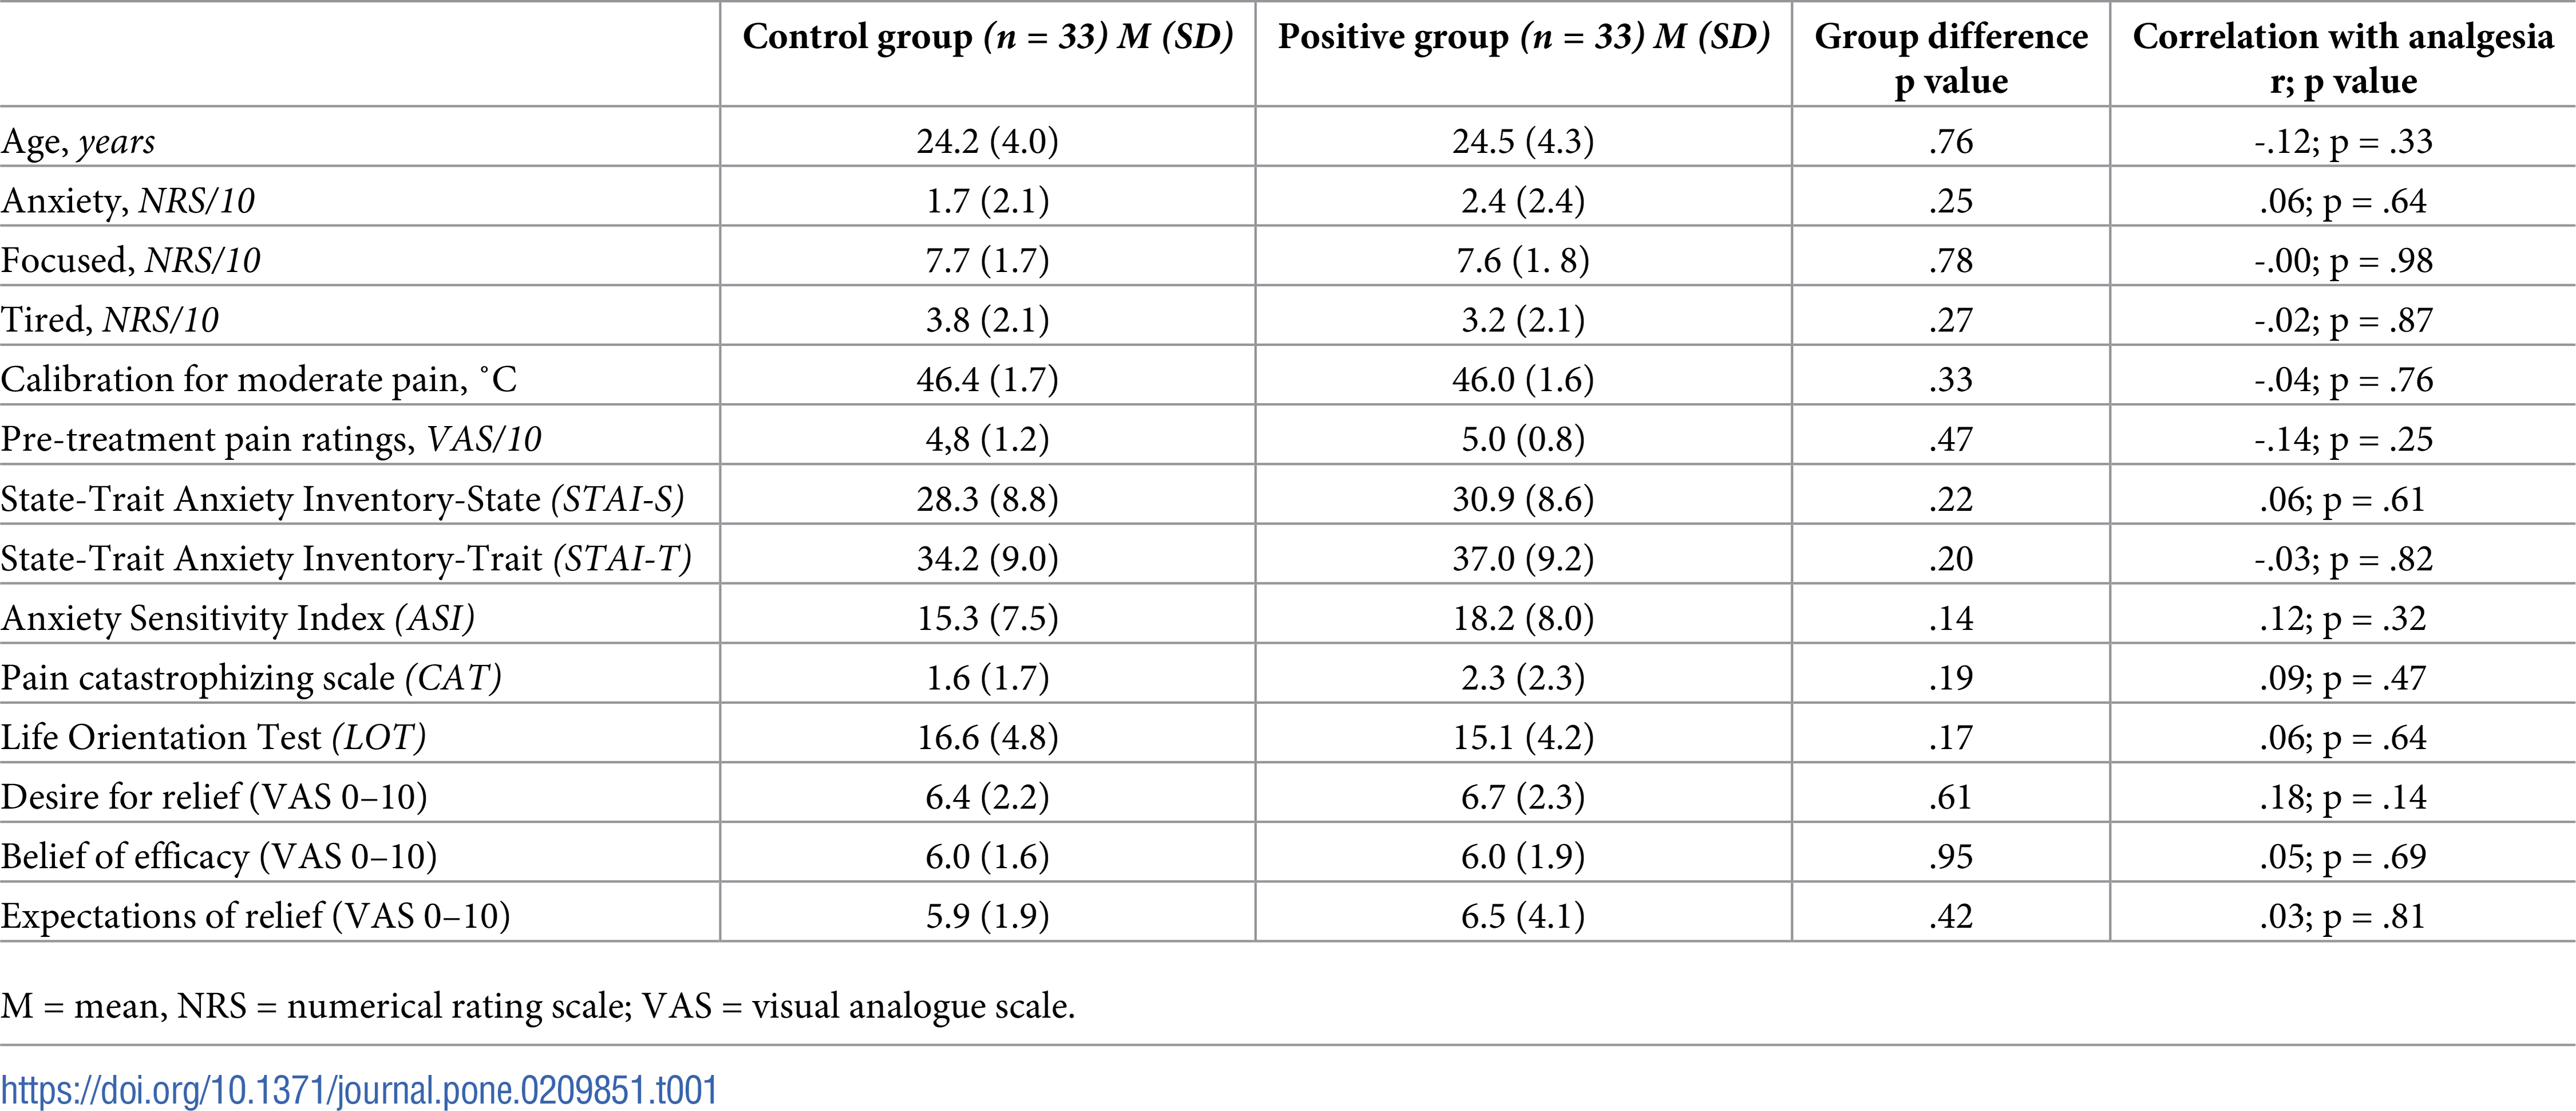

#### 🤔 2.2 Hypothèses testées (source : introduction de l'article)


- H1 : Le cadrage positif réduit la douleur perçue
- H2 : Le cadrage positif réduit les effets secondaires perçus
- H3 : L'effet du cadrage est modéré par le niveau d'optimisme (interaction)

Ces hypothèses sont détaillées dans le paragraphe introductif et la section des analyses statistiques.



🔍 H1 : Total GASE score
p-value : 0.7380

🔍 H2 : Douleur après traitement
p-value : 0.6623

🔍 H3 : Interaction Groupe x Optimiste (modèle de régression)
p-value : 0.8883


c:\Users\nassi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


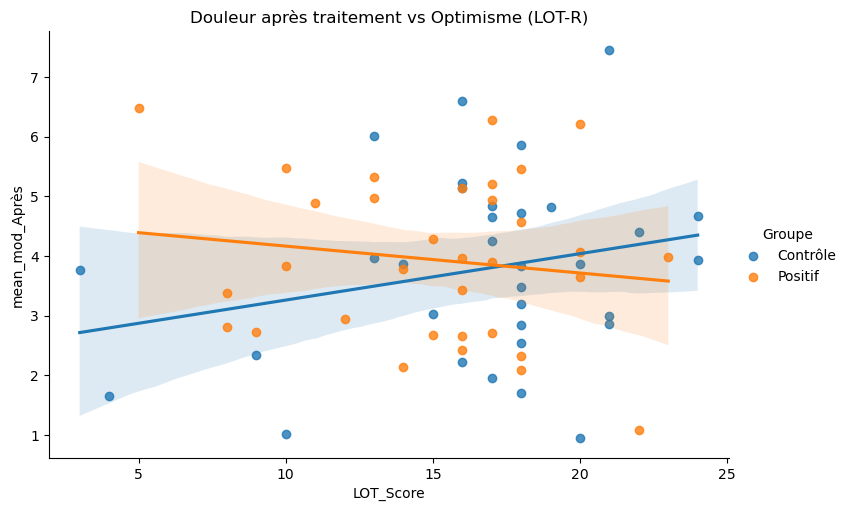

In [6]:
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# 🔍 H1 — Le cadrage réduit les effets secondaires perçus (Total GASE)
print("\n🔍 H1 : Total GASE score")
if 'Total_GASE_score' in df.columns:
    controle = df[df['Groupe'] == 'Contrôle']
    positif = df[df['Groupe'] == 'Positif']
    stat_h1, pval_h1 = ttest_ind(controle['Total_GASE_score'], positif['Total_GASE_score'])
    print(f"p-value : {pval_h1:.4f}")


# 🔍 H2 — Le cadrage réduit la douleur perçue après traitement
print("\n🔍 H2 : Douleur après traitement")
stat_h2, pval_h2 = ttest_ind(controle['mean_mod_Après'], positif['mean_mod_Après'])
print(f"p-value : {pval_h2:.4f}")

# ✅ Création des colonnes nécessaires pour la régression (H3)
df['Groupe_num'] = df['Groupe'].map({'Contrôle': 0, 'Positif': 1})
df['Optimiste'] = (df['LOT_Score'] >= df['LOT_Score'].median()).astype(int)

# 🔍 H3 — L'effet du cadrage dépend de la personnalité (optimisme)
print("\n🔍 H3 : Interaction Groupe x Optimiste (modèle de régression)")
modele = smf.ols('mean_mod_Après ~ Groupe_num + Optimiste + Groupe_num:Optimiste', data=df).fit()
pval_h3 = modele.pvalues.get('Groupe_num:Optimiste', None)
print(f"p-value : {pval_h3:.4f}" if pval_h3 is not None else "Interaction non trouvée dans le modèle")

# 🔍 H4 — Vérification graphique (facultatif)
sns.lmplot(data=df, x='LOT_Score', y='mean_mod_Après', hue='Groupe', aspect=1.5)
plt.title("Douleur après traitement vs Optimisme (LOT-R)")
plt.show()


Les p-values obtenues (> 0.05) indiquent que les différences observées entre les groupes ne sont pas statistiquement significatives. Ainsi, aucun effet du cadrage ou de l’interaction avec l’optimisme n’a été détecté sur les variables mesurées dans cet échantillon. Cela ne signifie pas que l’effet n’existe pas, mais plutôt que les données actuelles ne permettent pas de le démontrer de manière fiable.


Le graphique montre une tendance visuelle opposée entre les groupes, mais les larges intervalles de confiance indiquent une forte incertitude. Cela est cohérent avec le test statistique (p = 0.8883) qui rejette l'hypothèse d'une interaction significative entre le cadrage de l'information et le niveau d'optimisme.



Dans cette partie, nous analysons la corrélation entre la **réduction de douleur (analgésie)** et les **effets secondaires perçus** (GASE) rapportés par les participants.

L'analgésie est définie ici comme :  
**Analgésie = Douleur après - Douleur avant**  
→ Plus cette valeur est **négative**, plus la douleur a diminué.

Nous générons 6 graphes :
- A / A.1 / A.2 : corrélation avec le score GASE total
- B / B.1 / B.2 : corrélation avec le score GASE attribué au médicament

Chaque graphique affiche :
- Le nuage de points
- Une droite de régression linéaire
- La corrélation de Pearson (r) et sa p-value

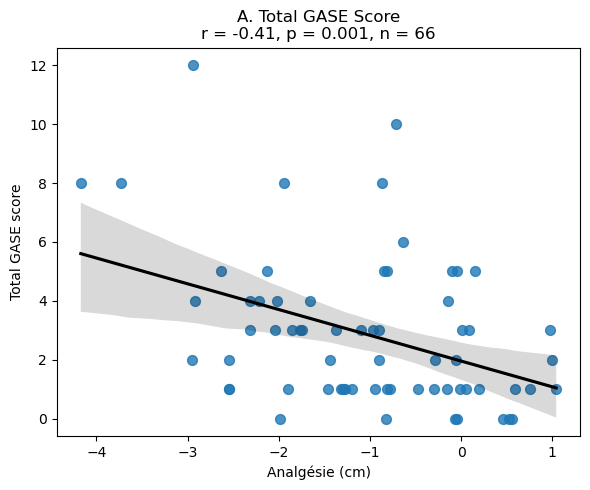

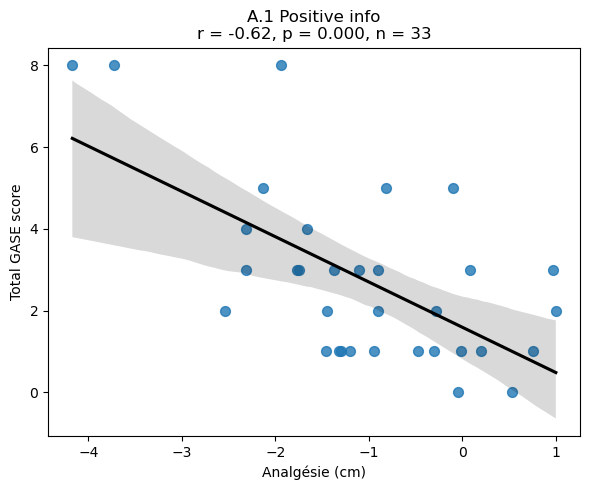

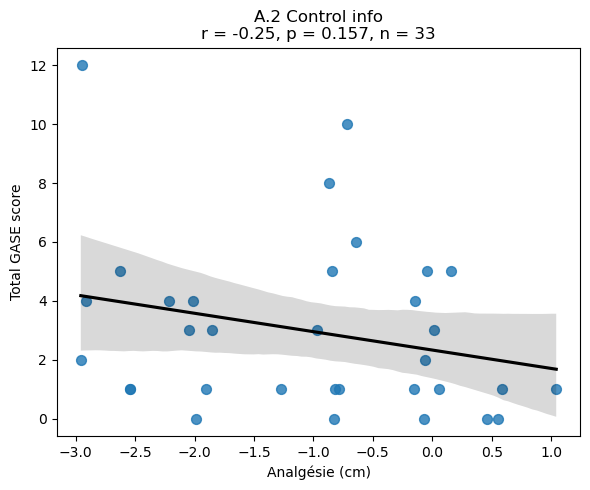

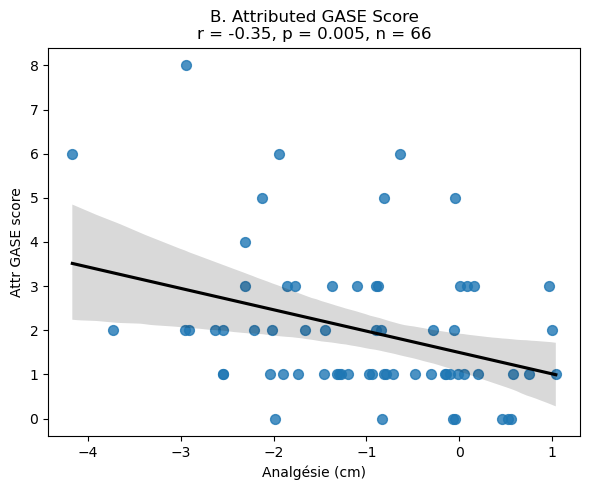

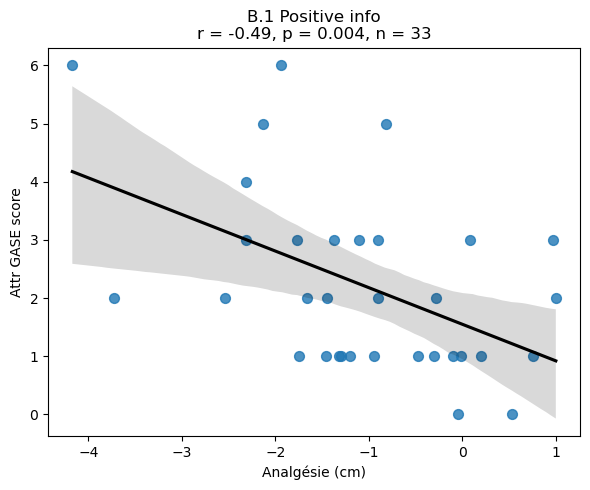

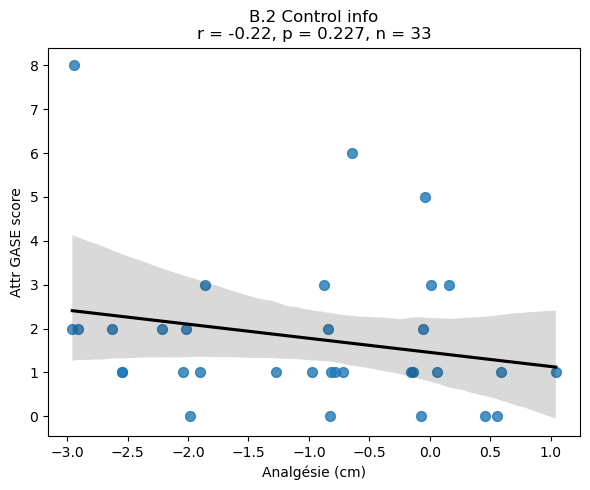

In [8]:

# ✅ Affichage des 6 graphes analytiques (effets secondaires vs analgésie)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Création des groupes (au cas où pas encore faits)
df['Delta_Mean_Mod'] = df['mean_mod_Après'] - df['mean_mod_Av']

gase_cols = [col for col in df.columns if col.startswith("gase")]
df['Total_GASE_score'] = df[gase_cols].sum(axis=1)
df['Attr_GASE_score'] = df[gase_cols].apply(lambda row: (row == 1).sum(), axis=1)

df['Groupe'] = df['@1N_2P'].replace({1: 'Contrôle', 2: 'Positif'})
groupe_all = df
groupe_positif = df[df['Groupe'] == 'Positif']
groupe_controle = df[df['Groupe'] == 'Contrôle']

graphes = [
    ("A. Total GASE Score", 'Total_GASE_score', groupe_all),
    ("A.1 Positive info", 'Total_GASE_score', groupe_positif),
    ("A.2 Control info", 'Total_GASE_score', groupe_controle),
    ("B. Attributed GASE Score", 'Attr_GASE_score', groupe_all),
    ("B.1 Positive info", 'Attr_GASE_score', groupe_positif),
    ("B.2 Control info", 'Attr_GASE_score', groupe_controle)
]

for titre, ycol, sous_df in graphes:
    valid_df = sous_df[['Delta_Mean_Mod', ycol]].dropna()

    plt.figure(figsize=(6, 5))
    if len(valid_df) >= 2:
        sns.regplot(
            data=valid_df,
            x='Delta_Mean_Mod',
            y=ycol,
            scatter_kws={'s': 50, 'alpha': 0.8},
            line_kws={'color': 'black'}
        )
        r, p = pearsonr(valid_df['Delta_Mean_Mod'], valid_df[ycol])
        plt.title(f"{titre}\nr = {r:.2f}, p = {p:.3f}, n = {len(valid_df)}")
    else:
        plt.text(0.5, 0.5, "Pas assez de données", ha='center', va='center')
        plt.title(f"{titre} (données insuffisantes)")

    plt.xlabel("Analgésie (cm)")
    plt.ylabel(ycol.replace("_", " "))
    plt.tight_layout()
    plt.show()


Contrairement aux hypothèses initiales (effet protecteur du cadrage positif), les résultats montrent ici une **corrélation positive** :  
> Plus les patients semblent soulagés, plus ils rapportent d'effets secondaires.
